In [2]:
%load_ext autoreload
%autoreload 2

import draftAnal20 as DA
import pandas as pd
import pickle as pk
from datetime import datetime

In [3]:
Data = DA.initialize('./Data/INPUT/')

In [4]:
draft_dic = DA.fill_drafts(Data)

In [ ]:
DA.run_bcl(Data)

In [ ]:
draft_dic = DA.import_contigs(Data, draft_dic)

In [ ]:
draft_dic = DA.Slide(Data, draft_dic)

In [ ]:
import pickle as pk
from datetime import datetime
now = datetime.now()
timestmp = now.strftime("%d-%m-%Y-%H-%M")
print(timestmp)
Data.to_pickle('Data'+timestmp+'.pk')
pk.dump( draft_dic, open( "./Data/OUTPUT/draft_dic"+timestmp+".p", "wb" ) )

In [ ]:
print('1')

In [48]:
fin_dra_sl = pd.DataFrame()
authors = [author['Name'] for _, author in Data.iterrows()]
sliding_mn = [draft_dic[name].iloc[-1]['Sliding_mn'].item() for name in authors]
sliding_dev = [draft_dic[name].iloc[-1]['Sliding_dev'].item() for name in authors]
fin_dra_sl['author'] = authors
fin_dra_sl['sliding_mn'] = sliding_mn
fin_dra_sl['sliding_dev'] = sliding_dev

/home/ruggiero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ruggiero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.


Text(0, 0.5, 'Cross-entropy [bits/character]')

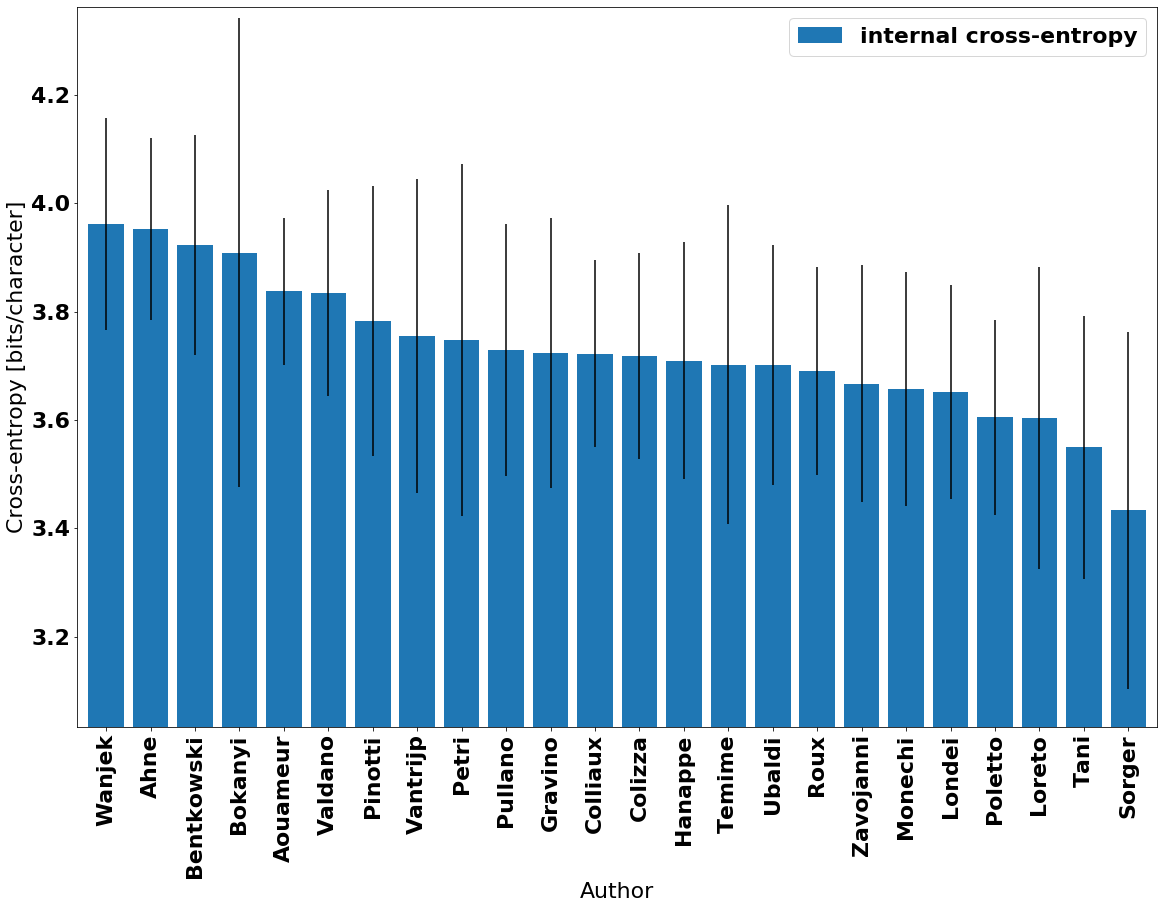

In [54]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
figure= plt.figure(figsize=(15,10))
ax=figure.add_axes([1,1,1,1])
fin_dra_sl = fin_dra_sl.sort_values(by='sliding_mn', ascending=False)
fin_dra_sl.plot(x='author', y='sliding_mn', yerr='sliding_dev', kind='bar', ax=ax, width = 0.8,
               label = "internal cross-entropy")
padding = 0.4
plt.ylim([fin_dra_sl['sliding_mn'].min()-padding, fin_dra_sl['sliding_mn'].max()+padding])
plt.xlabel('Author')
plt.ylabel('Cross-entropy [bits/character]')